In [1]:
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle 
import numpy as np
with open('./traffic-signs-data/train.p', 'rb') as f:
    train_images = pickle.load(f)
with open('./traffic-signs-data/valid.p', 'rb') as f:
    valid_images = pickle.load(f)
with open('./traffic-signs-data/test.p', 'rb') as f:
    test_images = pickle.load(f)
    
train_features, train_label = train_images['features'], train_images['labels']

valid_features,valid_label = valid_images['features'], valid_images['labels']

test_features, test_label = test_images['features'], test_images['labels']




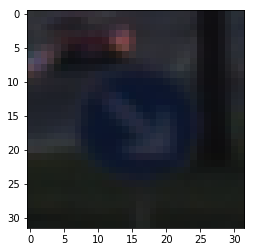

In [77]:
#flipud
#Flip an array vertically (axis=0).
#fliplr
#Flip an array horizontally (axis=1).
x=15000
plt.imshow(train_features[x])
ig= np.roll(train_features[x], 10)
ig= np.roll(ig, 10,axis=0)


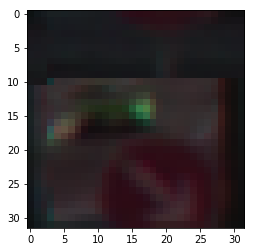

In [78]:
plt.imshow(ig)

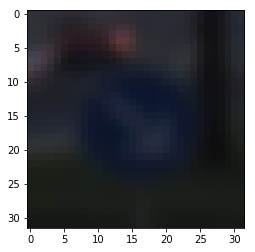

In [79]:
from skimage import filters as fil

ik = fil.gaussian(train_features[x], sigma=1, multichannel=True)
plt.imshow(ik)

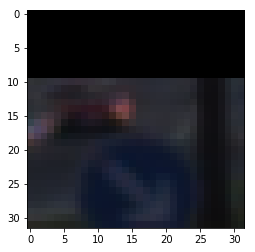

In [80]:
from skimage import transform as tr
tform = tr.SimilarityTransform(translation=(0, -10))
warped = tr.warp(train_features[x], tform)
plt.imshow(warped)

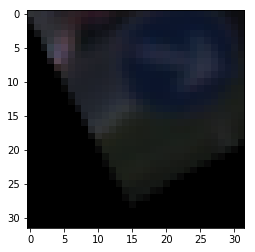

In [85]:
tform = tr.AffineTransform(scale=(1, 1), rotation=-0.5, translation=(0, 0))
igg = tr.warp(train_features[x], tform.inverse)

plt.imshow(igg)

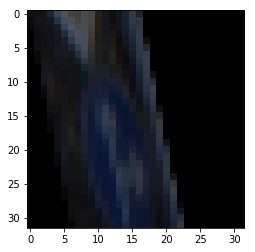

In [65]:
tform = tr.AffineTransform(scale=(0.5, 1.5), rotation=-0.2, translation=(0, 0))
igg1 = tr.warp(train_features[x], tform.inverse)

plt.imshow(igg1)

Data augmentation stratergy

horizontal flip -> np.fliplr
vertical flip->np.flipup
Blurring-> using Gaussian smoothing method -> will be using skimage lib
scale(0.5,0.5) rot =  -0.2
scale(1,1) rot =0.5
scale(1,1) rot =-0.5
scale(0.5,0.5) rot =0 --> add translation 
scale(1,1.8), rot=0

Loop through every 4 images in the train_data and generate above augmented images



TypeError: Cannot cast ufunc subtract output from dtype('float64') to dtype('uint8') with casting rule 'same_kind'

In [33]:
import pandas as pd

df = pd.read_csv('signnames.csv')
df2 = pd.DataFrame(train_label)
df.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [34]:
test =pd.DataFrame(train_label)
test.head()

,0
0,41
1,41
2,41
3,41
4,41


In [35]:
df2.columns = ['ClassId']
df2 = df2.merge(df, on='ClassId', how='left') # merging a column into another df 


In [36]:
df3=df2.groupby('SignName').count()  #group by and getting unique count of each class

print(df3)
df3.describe()

                                                    ClassId
SignName                                                   
Ahead only                                             1080
Beware of ice/snow                                      390
Bicycles crossing                                       240
Bumpy road                                              330
Children crossing                                       480
Dangerous curve to the left                             180
Dangerous curve to the right                            300
Double curve                                            270
End of all speed and passing limits                     210
End of no passing                                       210
End of no passing by vehicles over 3.5 metric tons      210
End of speed limit (80km/h)                             360
General caution                                        1080
Go straight or left                                     180
Go straight or right                    

,ClassId
count,43.000000
mean,809.279070
std,626.750855
min,180.000000
25%,285.000000
50%,540.000000
75%,1275.000000
max,2010.000000


In [ ]:
print(type(df3))

In [ ]:
plt.rcParams['figure.figsize'] = (30,18) #increasing the size of the plot figure
df3.plot(kind='bar')


In [ ]:
df3['ClassNames'] = df3.index # converting an index into coln

In [ ]:
df3


In [ ]:
df4=df2.groupby('SignName')['ClassId'].count() #Removes the cols name and changes the type to SERIES

print(type(df4))

In [ ]:
df3['ClassId'].nlargest(10) # Top 10 classes

In [ ]:
df3['ClassId'].nsmallest(10) # last 10 classes

In [ ]:
plt.rcParams['figure.figsize'] =(10,6)
fig =plt.figure(figsize=(5,5))
fig.add_subplot(4,4,1)
plt.imshow(train_features[0])
fig.add_subplot(4,4,2)
plt.imshow(train_features[78])
fig.add_subplot(4,4,3)
plt.imshow(train_features[777])
fig.add_subplot(4,4,4)
plt.imshow(train_features[745])
fig.add_subplot(4,4,5)
plt.imshow(train_features[345])


In [ ]:
fig.add_subplot(4,4,1)
plt.imshow(train_features[0])
fig.add_subplot(4,4,2)
plt.imshow(train_features[78])
fig.add_subplot(4,4,3)
plt.imshow(train_features[777])
fig.add_subplot(4,4,4)
plt.imshow(train_features[745])
fig.add_subplot(4,4,5)
plt.imshow(train_features[345])

In [ ]:
from random import randint # to generate random positive integers between a range of numbers
fig =plt.figure(figsize=(15,15))
for a in range(1,101):
    rand_img = randint(0, 33000)
    fig.add_subplot(10,10,a)
    plt.imshow(train_features[rand_img])
    

In [ ]:
fig =plt.figure(figsize=(10,1))
df2.loc[rand_img,'SignName']

plt.title(df2.loc[rand_img,'SignName'] +':'+str(df2.loc[rand_img,'ClassId']))

for a in range(1,11):
    rand_img = randint(0, 10)
    fig.add_subplot(1,10,a)
    plt.imshow(train_features[rand_img])
    

In [ ]:
plt.imshow(train_features[0])

In [ ]:
img = train_features[:,:,:,1]
img = img.reshape(img.shape + (1,))
imf = img[0].squeeze() #### very important
plt.imshow(imf)

In [ ]:
import cv2

x_train =np.zeros((len(train_features),32,32))
x_valid =np.zeros((len(valid_features),32,32))
x_test =np.zeros((len(test_features),32,32))

for i in range(0, (len(train_features))):
    x_train[i] = cv2.cvtColor(train_features[i], cv2.COLOR_RGB2GRAY)
for i in range(0, (len(valid_features))):
    x_valid[i] = cv2.cvtColor(valid_features[i], cv2.COLOR_RGB2GRAY)
for i in range(0, (len(test_features))):
    x_test[i] = cv2.cvtColor(test_features[i], cv2.COLOR_RGB2GRAY)

In [ ]:
pmean=np.mean(x_train)
pstd=np.std(x_train)
x_train = (x_train - pmean)/pstd

pmean=np.mean(x_valid)
pstd=np.std(x_valid)
x_valid = (x_valid - pmean)/pstd

pmean=np.mean(x_test)
pstd=np.std(x_test)
x_test = (x_test - pmean)/pstd

In [ ]:
print(pmean)
print(pstd)

In [ ]:
print(x_train[1])


In [ ]:
from skimage import exposure as e


plt.imshow(x_train[30], cmap='gray')

In [ ]:

for i in range(0,32):
    print(x_train[30][i])

In [ ]:
plt.hist(x_train[30])

In [ ]:
for i in range(0, len(x_train)):
    x_train[i] = e.equalize_adapthist(x_train[i], clip_limit=0.05)
    print(i)

In [ ]:
print(x_train[0])

In [ ]:
fig =plt.figure(figsize=(15,15))
for a in range(1,101):
    rand_img = randint(0, 33000)
    fig.add_subplot(10,10,a)
    plt.imshow(x_train[rand_img].squeeze(), cmap='gray')

In [ ]:
x_train= x_train.reshape(x_train.shape + (1,))
x_valid= x_valid.reshape(x_valid.shape + (1,))
x_test= x_test.reshape(x_test.shape + (1,))

print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)

In [ ]:
fig =plt.figure(figsize=(15,15))
for a in range(1,101):
    rand_img = randint(0, 33000)
    fig.add_subplot(10,10,a)
    plt.imshow(x_train[rand_img].squeeze(), cmap='gray')

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten
#x_train =np.zeros((len(train_features),32,32))

EPOCHS = 1
BATCH_SIZE = 128

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
  
    # SOLUTION: Activation.
    
    conv1 = tf.nn.relu(conv1, name='conv1')

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma)) #changed here
    fc3_b  = tf.Variable(tf.zeros(43)) #changed here
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits



In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32,1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

#tf.argmax -> returns the index of largest value across the axes of the tensor inthe below example the axes is 1
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        #print('accuracy= ',accuracy)
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(x_train) #changed here
    
    print("Training...")
    for i in range(EPOCHS):
        X_train, y_train = shuffle(x_train, train_label) # changed here
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end] 
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        validation_accuracy = evaluate(x_valid, valid_label) #changed here
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    saver.restore(sess, './lenet.ckpt')

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))